In [236]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint

import numpy as np

In [237]:
batch_size = 128
n_classes = 10
n_epochs = 15

im_row, im_col = 28, 28

In [238]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

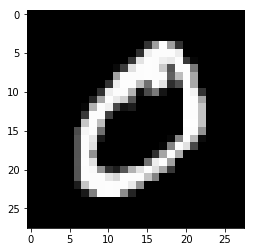

In [239]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[1], cmap='gray')
plt.show()

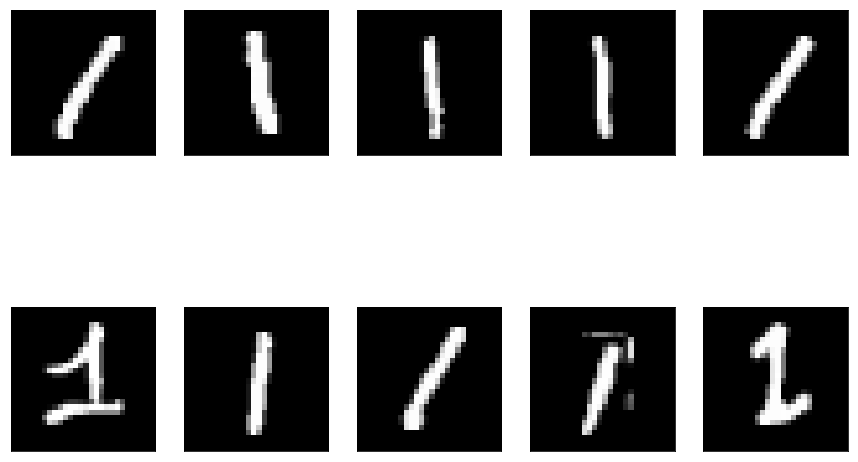

In [240]:
fig = plt.figure(figsize=(15,10))

i = 0
for f in range(0, y_train.shape[0]):
    if(y_train[f] == 1 and i < 10):
        plt.subplot(2, 5, i+1)
        plt.imshow(x_train[f], cmap='gray')
        plt.xticks([])
        plt.yticks([])
        i = i + 1

plt.show()

In [241]:
print("x_train: {}\nx_test: {}\n".format( 
x_train.shape, x_test.shape, ))

x_train: (60000, 28, 28)
x_test: (10000, 28, 28)



In [242]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, im_row, im_col)
    x_test = x_test.reshape(x_test.shape[0], 1, im_row, im_col)
    input_shape = (1, im_row, im_col)
else:
    x_train = x_train.reshape(x_train.shape[0], im_row, im_col, 1)
    x_test = x_test.reshape(x_test.shape[0], im_row, im_col, 1)
    input_shape = (im_row, im_col, 1)

In [243]:
print(y_test[0])

7


In [244]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [245]:
print("x_train: {}\nx_test: {}\ninput_shape: {}\n \
# of training samples: {}\n# of testing samples: {}".format( 
x_train.shape, x_test.shape, input_shape, x_train.shape[0], x_test.shape[0]))

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)
input_shape: (28, 28, 1)
 # of training samples: 60000
# of testing samples: 10000


In [264]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
__________

In [265]:
checkpoint = ModelCheckpoint(filepath="keras_MNIST_CNN.h5",
                               verbose=0,
                               save_best_only=True)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[checkpoint])

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 9s - loss: 0.2444 - acc: 0.9258 - val_loss: 0.0485 - val_acc: 0.9844
Epoch 2/15
60000/60000 [==============================] - 7s - loss: 0.0878 - acc: 0.9743 - val_loss: 0.0391 - val_acc: 0.9869
Epoch 3/15
60000/60000 [==============================] - 7s - loss: 0.0625 - acc: 0.9815 - val_loss: 0.0330 - val_acc: 0.9893
Epoch 4/15
60000/60000 [==============================] - 7s - loss: 0.0531 - acc: 0.9844 - val_loss: 0.0322 - val_acc: 0.9898
Epoch 5/15
60000/60000 [==============================] - 7s - loss: 0.0449 - acc: 0.9865 - val_loss: 0.0329 - val_acc: 0.9889
Epoch 6/15
60000/60000 [==============================] - 7s - loss: 0.0410 - acc: 0.9875 - val_loss: 0.0281 - val_acc: 0.9914
Epoch 7/15
60000/60000 [==============================] - 7s - loss: 0.0345 - acc: 0.9889 - val_loss: 0.0283 - val_acc: 0.9910
Epoch 8/15
60000/60000 [==============================] - 7s 

In [266]:
from sklearn.metrics import roc_auc_score

preds = model.predict(x_test)
auc = roc_auc_score(np.round(preds), y_test)
print("AUC: {:.2%}".format (auc))

AUC: 99.64%


In [292]:
np.round(preds)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [267]:

preds = model.predict(x_test)
print("Predictions for x_test[0]: {}\n\nActual label for x_test[0]: {}\n".format(preds[0], y_test[0]))
print("Predictions for x_test[0] after rounding: {}\n".format(np.round(preds)[0]))


Predictions for x_test[0]: [4.1195924e-19 4.8884741e-14 1.1587565e-13 1.5126733e-13 1.3377293e-15
 7.9817291e-17 2.9398691e-23 1.0000000e+00 5.9718682e-15 1.5278325e-13]

Actual label for x_test[0]: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

Predictions for x_test[0] after rounding: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]



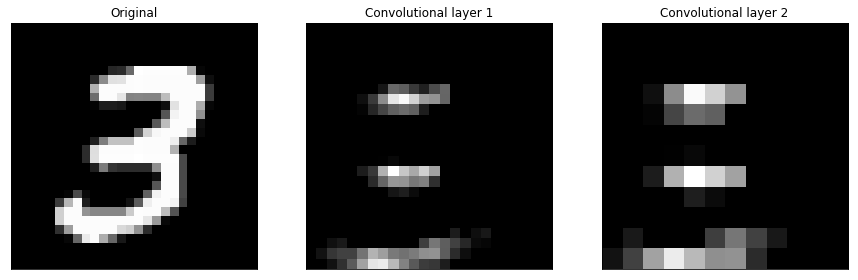

In [289]:
from keras import models

layers = [layer.output for layer in model.layers[:4]] 
model_layers = models.Model(inputs=model.input, outputs=layers) 
activations = model_layers.predict(x_train) 

fig = plt.figure(figsize=(15,10))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(x_train[7].reshape(28, 28), cmap='gray')
plt.xticks([])
plt.yticks([])

for f in range(1, 3):
    plt.subplot(1, 3, f+1)
    plt.title("Convolutional layer %d" % f)
    layer_activation = activations[f]
    plt.imshow(layer_activation[7, :, :, 0], cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()


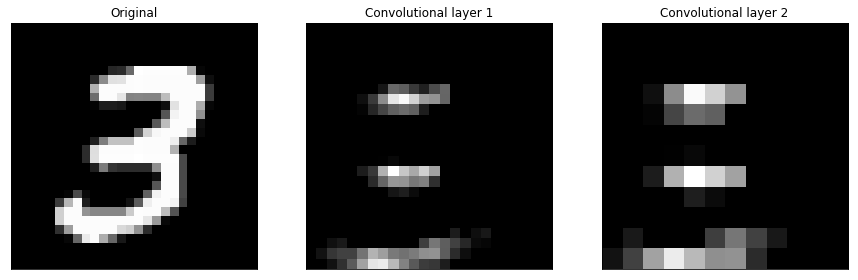

In [288]:
fig = plt.figure(figsize=(15,10))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(x_train[7].reshape(28, 28), cmap='gray')
plt.xticks([])
plt.yticks([])

for f in range(1, 3):
    plt.subplot(1, 3, f+1)
    plt.title("Convolutional layer %d" % f)
    layer_activation = activations[f]
    plt.imshow(layer_activation[7, :, :, 0], cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

(60000, 12, 12, 64)


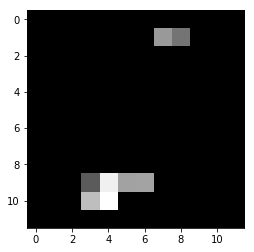

In [273]:
first_layer_activation = activations[2]
print(first_layer_activation.shape)
plt.imshow(first_layer_activation[1, :, :, 4], cmap='gray')

In [257]:

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
10624/60000 [====>.........................] - ETA: 9s - loss: 0.0150 - acc: 0.9952

KeyboardInterrupt: 